In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df =  pd.read_csv('/content/study_hours_cgpa_linear_dataset.csv')
df.head()

,Study_Hours,CGPA
0,0.00000,5.149014
1,0.10101,5.009026
2,0.20202,5.295317
3,0.30303,5.608424
4,0.40404,5.131774


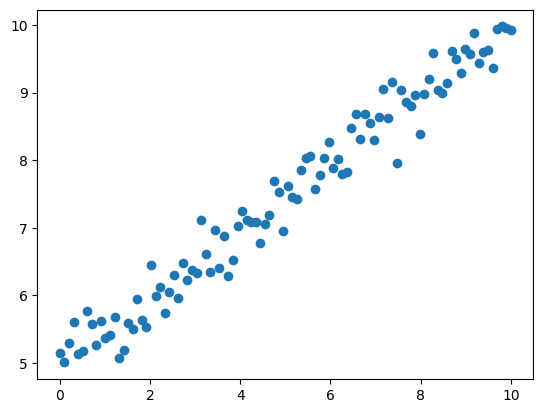

In [5]:
plt.scatter(df['Study_Hours'],df['CGPA'])
# data is linear

In [6]:
X = df.iloc[:,0:-1]# i/p col
X

,Study_Hours
0,0.00000
1,0.10101
2,0.20202
3,0.30303
4,0.40404
...,...
95,9.59596
96,9.69697
97,9.79798
98,9.89899


In [7]:
y = df.iloc[:,1] # o/p col
y

,CGPA
0,5.149014
1,5.009026
2,5.295317
3,5.608424
4,5.131774
...,...
95,9.358925
96,9.937321
97,9.977306
98,9.951029


In [8]:
split_idx = 0.8 * len(X)
split_idx = int(split_idx)

In [9]:
X_train , X_test = X.iloc[:split_idx] , X.iloc[split_idx:]
y_train,  y_test = y.iloc[:split_idx] , y.iloc[split_idx:]
X_train

,Study_Hours
0,0.000000
1,0.101010
2,0.202020
3,0.303030
4,0.404040
...,...
75,7.575758
76,7.676768
77,7.777778
78,7.878788


In [10]:
class legRG:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    num=0
    den=0

    for i in range(len(X_train)):

      num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m)
    print(self.b)


  def predict(self,X_test):
      return self.m * X_test + self.b





In [14]:
class legRG:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self, X_train, y_train):
    num = 0
    den = 0

    # Convert X_train (DataFrame) to a Series for easier element-wise operations.
    # Assuming X_train always has a single column.
    if isinstance(X_train, pd.DataFrame):
        X_train_processed = X_train.iloc[:, 0]
    else:
        X_train_processed = X_train

    # Calculate means once
    X_mean = X_train_processed.mean()
    y_mean = y_train.mean()

    for i in range(len(X_train_processed)):
      # Access scalar values using .iloc for Series
      num = num + ((X_train_processed.iloc[i] - X_mean) * (y_train.iloc[i] - y_mean))
      den = den + ((X_train_processed.iloc[i] - X_mean) * (X_train_processed.iloc[i] - X_mean))

    self.m = num / den
    self.b = y_mean - (self.m * X_mean)

    print("Slope (m):", self.m)
    print("Intercept (b):", self.b)

  def predict(self, X_test):
    # Apply similar processing for X_test to handle DataFrame input
    if isinstance(X_test, pd.DataFrame):
        X_test_processed = X_test.iloc[:, 0]
    else:
        X_test_processed = X_test
    return self.m * X_test_processed + self.b


In [15]:
lr = legRG()
lr.fit(X_train, y_train)

Slope (m): 0.5035563874660887
Intercept (b): 4.9486583277522325
